In [1]:
import sympy as sym

import numpy as np

import itertools

sym.init_printing()

In [2]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [3]:
import evol_dynamics

In [4]:
import matplotlib.pyplot as plt
import matplotlib

from collections import Counter

In [5]:
matplotlib.rc('font', **font)

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [7]:
from tqdm import tqdm

In [8]:
import pandas as pd

In [9]:
from scipy import stats

In [9]:
s_one = (0, 0, 0)
s_two = (1, 1, 0)

In [10]:
payoff_vector = np.array(evol_dynamics.donation_game(1, 3))

In [11]:
evol_dynamics.steady_state(s_two, s_one, delta=0.999) @ payoff_vector 

**Defining variables**

In [9]:
y_1, p_1, q_1 = sym.symbols("y_1, p_1, q_1")
y_2, p_2, q_2 = sym.symbols("y_2, p_2, q_2")

In [10]:
s_one = (y_1, p_1, q_1)
s_two = (y_2, p_2, q_2)

In [11]:
s_one

In [12]:
combinations = itertools.product([s_one, s_two], repeat=2)

In [13]:
list(combinations)

**Get expression using code**

In [14]:
d = sym.symbols("delta")

In [15]:
v_zero = evol_dynamics.expected_distribution_opening_round(s_one, s_two)

In [16]:
v_zero

In [17]:
M = evol_dynamics.markov_chain_for_reactive_strategies(s_one, s_two)

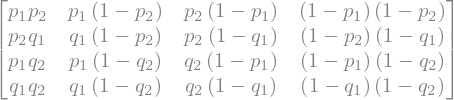

In [18]:
sym.Matrix(M)

In [19]:
inverse = sym.Matrix(np.identity(4) - d * M).inverse_ADJ()

In [20]:
expression = (1 - d) * sym.Matrix(v_zero).reshape(1, 4) @ inverse

**Check the written mathematics**

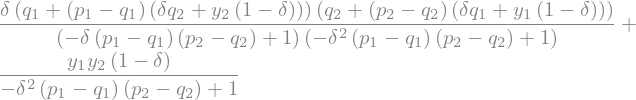

In [21]:
u_R = evol_dynamics.formulation.probability_being_in_state_R(s_one, s_two, d)
u_R

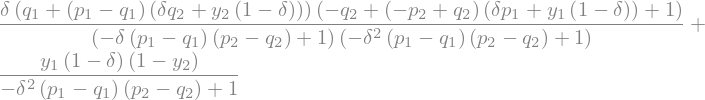

In [22]:
u_S = evol_dynamics.formulation.probability_being_in_state_S(s_one, s_two, d)
u_S

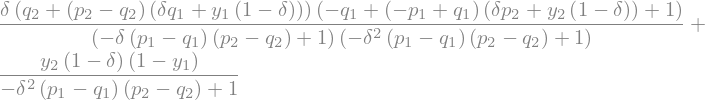

In [23]:
u_T = evol_dynamics.formulation.probability_being_in_state_T(s_one, s_two, d)
u_T

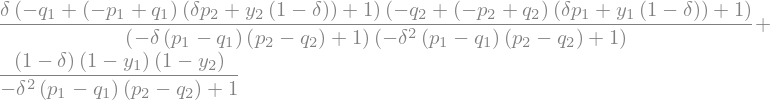

In [24]:
u_P = evol_dynamics.formulation.probability_being_in_state_P(s_one, s_two, d)
u_P

In [25]:
(u_R - expression[0]).simplify(), (u_S - expression[1]).factor()

In [26]:
(u_T - expression[2]).factor(), (u_P - expression[3]).factor()

**Check functions for analysis of ALLD into GTFT**

In [27]:
q = sym.symbols("q")

N, k = sym.symbols("N, k")

In [28]:
ALLD = (0, 0, 0)
GTFT = (1, 1, q)

**States of Eq. (9) and (10)**

In [29]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, GTFT, d).factor()

In [30]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [31]:
evol_dynamics.formulation.probability_being_in_state_R(GTFT, ALLD, d).factor()

In [32]:
evol_dynamics.formulation.probability_being_in_state_T(ALLD, GTFT, d).factor()

In [33]:
(
    evol_dynamics.formulation.probability_being_in_state_S(GTFT, GTFT, d).factor(),
    evol_dynamics.formulation.probability_being_in_state_T(GTFT, GTFT, d).factor(),
    evol_dynamics.formulation.probability_being_in_state_P(GTFT, GTFT, d).factor(),
)

In [34]:
evol_dynamics.formulation.probability_being_in_state_R(
    ALLD, GTFT, d
).factor(), evol_dynamics.formulation.probability_being_in_state_S(ALLD, GTFT, d).factor()

In [35]:
evol_dynamics.formulation.probability_being_in_state_T(
    ALLD, GTFT, d
).factor(), evol_dynamics.formulation.probability_being_in_state_P(ALLD, GTFT, d).factor()

**Simulations** - **Example in notes**

**Plotting simulation results**

In [31]:
exp = pd.read_csv("../matlab/data/expected/clean_c_1_b_10_stochastic_0.csv")

In [11]:
text_file = open("../matlab/data/expected/beta_10_stochastic_0.txt", "r")
data = text_file.readlines()

In [12]:
data[0].replace(",", "")

'R=2; S=-1; T=3; P=0; N=100; beta=10; nIt=10000000; stochastic=0\n'

In [13]:
evol_dynamics.donation_game(1, 3)

In [36]:
exp = exp.drop_duplicates()

In [15]:
import matplotlib.colors as colors

In [16]:
cmap = matplotlib.cm.get_cmap("Blues")

In [37]:
ps, qs = [], []
for p, q, v in zip(exp["p"], exp["q"], exp["frequencies"]):
    for _ in range(int(v)):
        ps.append(p)
        qs.append(q)

In [22]:
params = {"text.color" : "black",
          "xtick.color" : "black",
          "ytick.color" : "black"}

In [33]:
stoch = pd.read_csv("../matlab/data/stochastic/clean_c_1_b_10_stochastic_1.csv")

In [34]:
stoch = stoch.drop_duplicates()

In [38]:
ps_stoch, qs_stoch = [], []
for p, q, v in zip(stoch["p"], stoch["q"], stoch["frequencies"]):
    for _ in range(int(v)):
        ps_stoch.append(p)
        qs_stoch.append(q)

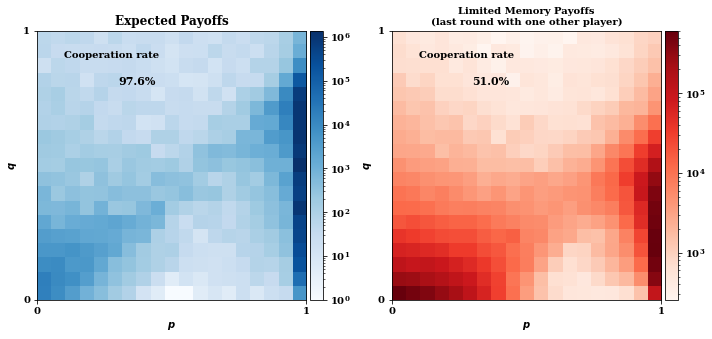

In [39]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 7))


heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[0].imshow(heatmap.T, extent=extent, origin="lower", cmap=cmap, norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))

divider = make_axes_locatable(axes[0])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')



heatmap, xedges, yedges = np.histogram2d(ps_stoch, qs_stoch, bins=19)

extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

im = axes[1].imshow(heatmap.T, extent=extent, origin="lower", cmap=matplotlib.cm.get_cmap("Reds"),
                 norm=colors.LogNorm(vmin=heatmap.min(),
                                                                                    vmax=heatmap.max()))

divider = make_axes_locatable(axes[1])
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(im, cax=cax, orientation='vertical')




for i, df in enumerate([exp, stoch]):
    axes[i].set_xticks(np.linspace(0, 1, 2))
    axes[i].set_yticks(np.linspace(0, 1, 2));
    axes[i].set_xlabel("$p$")
    axes[i].set_ylabel("$q$")
    
    axes[i].text(.1, .9, "Cooperation rate", color='black', fontsize=10)
    axes[i].text(.30, .8, f"{round(sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)), 3) * 100}%",
          color='black', fontsize=11);


axes[0].set_title("Expected Payoffs", weight="bold");
axes[1].set_title("Limited Memory Payoffs" "\n" "(last round with one other player)", weight="bold", fontsize=10);

fig.tight_layout()

fig.savefig("../static/expected_and_stochastic_for_donation_game_b_10.pdf", )

In [141]:
exp_coops = []
for value, times in zip(exp['average cooperation rate'], exp['frequencies']):
    for _ in range(times):
        exp_coops.append(value)

In [142]:
stoch_coops = []
for value, times in zip(stoch['average cooperation rate'], stoch['frequencies']):
    for _ in range(times):
        stoch_coops.append(value)

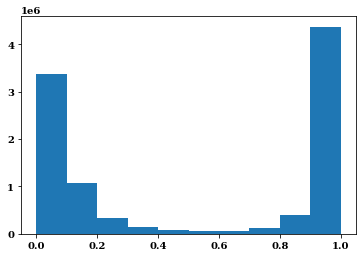

In [143]:
plt.hist(exp_coops);

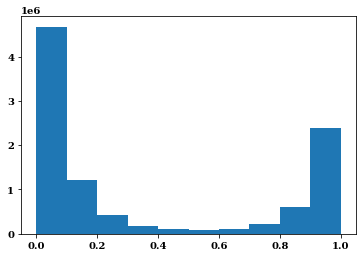

In [144]:
plt.hist(stoch_coops);

In [149]:
tStat, pStat = stats.mannwhitneyu(exp_coops, stoch_coops)

In [150]:
pStat

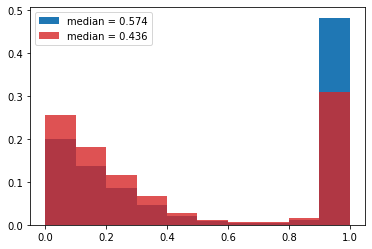

In [49]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["p"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [51]:
tStat, pStat = stats.ttest_ind(exp["p"], stoch["p"], equal_var=False)

In [52]:
pStat

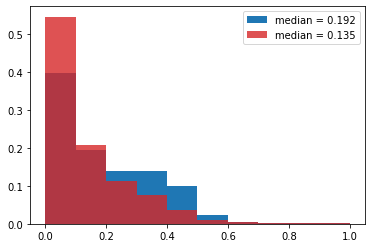

In [53]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["q"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [54]:
tStat, pStat = stats.ttest_ind(exp["q"], stoch["q"], equal_var=False)
pStat

# Distributions of cooperation

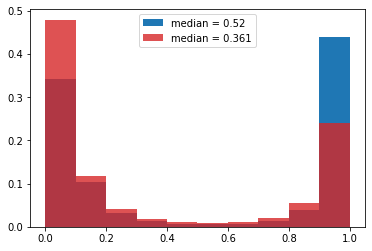

In [58]:
fig, ax = plt.subplots()

colors = ["C0", "C3"]
alphas = [1, 0.8]

for i, data in enumerate([exp, stoch]):

    measure = data["cooperation"]
    mean = np.mean(measure)
    weights = np.ones_like(measure) / float(len(measure))

    ax.hist(
        measure,
        weights=weights,
        label=f"median = {round(mean, 3)}",
        color=colors[i],
        alpha=alphas[i],
    )
ax.legend();

In [57]:
tStat, pStat = stats.ttest_ind(exp["cooperation"], stoch["cooperation"], equal_var=False)
pStat

In [127]:
k = [(1, 0, 0), [0, 1, 1]]

In [129]:
(1, 0, 0) in k

True

In [137]:
np.array([1, 2]).shape == (2, )

True

In [139]:
isinstance(3, int)

True

In [140]:
k = np.array([1, 2])

In [145]:
isinstance(k, np.ndarray)

True

In [146]:
type(k)

numpy.ndarray